### 1.Нормальное Распределение
Пример генерации выборки из Нормального Распределения с параметрами $\mu=2.0$ и $\sigma=0.5$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

In [2]:
# Создаем нормально распределенную случайную величину с параметрами
norm_dist = sts.norm(loc=2.0, scale=0.5)

# Генерируем 10 значений из нормального распределения
print(norm_dist.rvs(size=10))

# Возвращаем значение функции НР, соответствующей аргументу х
print()
print(norm_dist.cdf(3))

[3.03381629 1.8350729  1.36229772 2.82475511 1.27657125 2.05250035
 1.83070672 2.81321303 1.52347611 1.31359253]

0.9772498680518208


### График Функции Распределения Вероятности

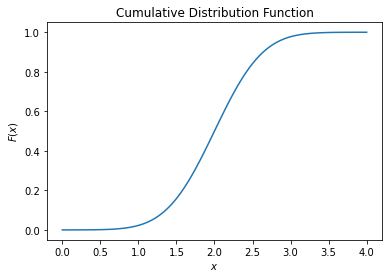

In [3]:
# Сгенерируем 100 значений аргумента 
x_vec = np.linspace(0, 4, 100)

# Получим значение функии cdf - Cumulative Distribution Function. cdf принимает не только скаляр, но и вектор 
cdf_func = norm_dist.cdf(x_vec)
plt.plot(x_vec, cdf_func)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title('Cumulative Distribution Function');

Получение значения функции плотности распределния вероятности, соответствующей агргументу х

In [4]:
print(norm_dist.pdf(3))

0.10798193302637613


### График Функции Плотности Распределения Вероятности

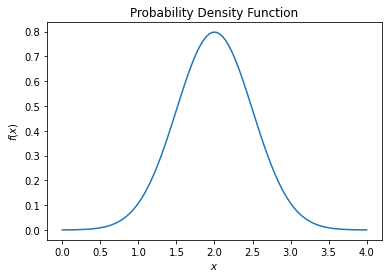

In [5]:
# Сгенерируем 100 значений аргумента 
x_vec = np.linspace(0, 4, 100)

# Получим значение функии pdf - Probability Density Function.
pdf_func = norm_dist.pdf(x_vec)
plt.plot(x_vec, pdf_func)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Probability Density Function');

### 2.Равномерное Распределение на Отрезке

In [6]:
a = 1
b = 4

# В этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_dist = sts.uniform(a, b-a)

print(uniform_dist.rvs(10))

[3.55006572 2.35863474 2.43814    3.20458023 1.61363197 2.93818947
 1.00726715 1.77248097 2.23112245 1.07687464]


### График Функции Распределения Вероятности

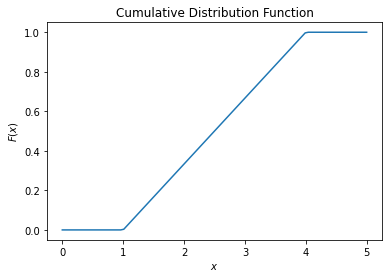

In [7]:
x_vec = np.linspace(0, 5, 100)
cdf_func = uniform_dist.cdf(x_vec)

plt.plot(x_vec, cdf_func)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title('Cumulative Distribution Function');

### График Функции Плотности Распределения Вероятности

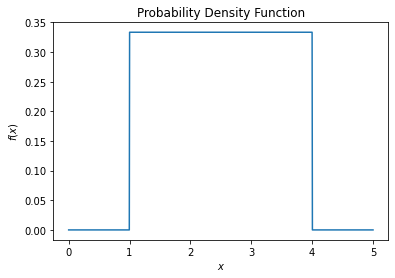

In [8]:
x_vec = np.linspace(0, 5, 1000)
pdf_func = uniform_dist.pdf(x_vec)

plt.plot(x_vec, pdf_func)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Probability Density Function');

### 3.Распределение Бернулли
Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [9]:
bernoulli_dist = sts.bernoulli(0.7)
bernoulli_dist.rvs(10)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

### 4.Биномиальное Распределение
Генерация выборок из биномиального распределения с параметрами $n$ и $p$

In [10]:
binomial_dist = sts.binom(n=20, p=0.7)
binomial_dist.rvs(10)

array([15, 17, 14, 15, 13, 12, 14, 15, 13, 13])

### График Функции Распределения Вероятности

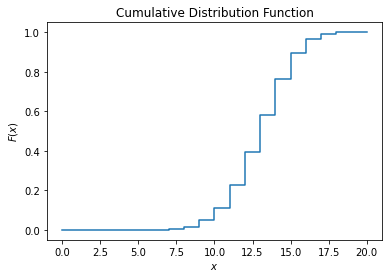

In [11]:
x_vec = np.linspace(0,20,21)
cdf_func = binomial_dist.cdf(x_vec)

plt.step(x_vec, cdf_func)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title('Cumulative Distribution Function');

### График Функции Плотности Распределения Вероятности
Необходимо использовать функцию ```pmf``` для дискретных случайных величин вместо ```pdf```

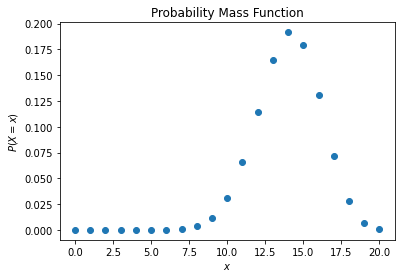

In [12]:
pdf_func = binomial_dist.pmf(x_vec)

plt.plot(x_vec, pdf_func, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.title('Probability Mass Function');

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

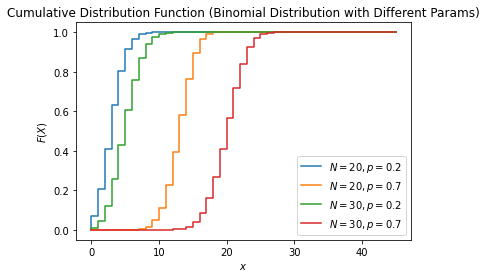

In [13]:
x_vec = np.linspace(0, 45, 46)

for n in [20, 30]:
    for p in [0.2, 0.7]:
        binomial_dist = sts.binom(n, p)
        cdf_dunc = binomial_dist.cdf(x_vec)
        plt.step(x_vec, cdf_dunc, label="$N=%s, p=%s$" %(n,p))
        
plt.legend()
plt.ylabel('$F(X)$')
plt.xlabel('$x$')
plt.title('Cumulative Distribution Function (Binomial Distribution with Different Params)');

Теперь взглянем на **Probability Mass Function**

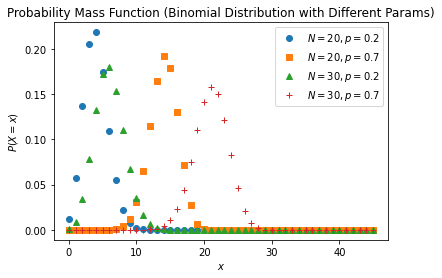

In [14]:
x_vec = np.linspace(0, 45, 46)
symbols = iter(['o', 's', '^', '+'])

for n in [20, 30]:
    for p in [0.2, 0.7]:
        binomial_dist = sts.binom(n, p)
        pmf_func = binomial_dist.pmf(x_vec)
        plt.step(x_vec, pmf_func, next(symbols),label="$N=%s, p=%s$" %(n,p))
        
plt.legend()
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.title('Probability Mass Function (Binomial Distribution with Different Params)');

### 5.Распределение Пуассона
Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [15]:
poisson_dist = sts.poisson(5)
poisson_dist.rvs(10)

array([1, 6, 2, 7, 5, 6, 3, 5, 3, 4])

### График Функции Распределения Вероятности

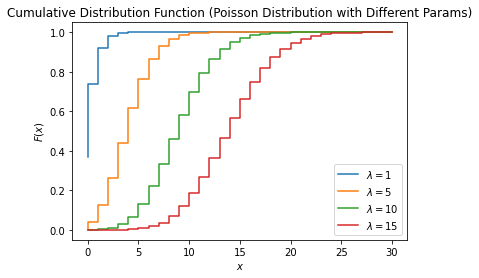

In [16]:
x_vec = np.linspace(0, 30, 31)
for lamda in  [1, 5, 10, 15]:
    poisson_dist = sts.poisson(lamda)
    cdf_func = poisson_dist.cdf(x_vec)
    plt.step(x_vec, cdf_func, label='$\lambda=%s$' %lamda)
        
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title('Cumulative Distribution Function (Poisson Distribution with Different Params)');

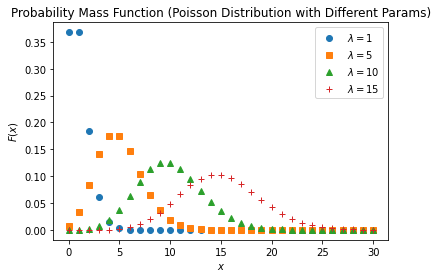

In [17]:
x_vec = np.linspace(0, 30, 31)
symbols = iter(['o', 's', '^', '+'])

for lamda in  [1, 5, 10, 15]:
    poisson_dist = sts.poisson(lamda)
    pmf_func = poisson_dist.pmf(x_vec)
    plt.step(x_vec, pmf_func, next(symbols), label='$\lambda=%s$' %lamda)
        
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title('Probability Mass Function (Poisson Distribution with Different Params)');

### 6.Дискретное Распределение Общего Вида 
Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [18]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([ 5,  5, 12, 12,  1,  5,  5,  5, 12,  5])

### 7.Распределение $\chi^2_k$
Имеет натуральный параметр $k$, который называется числом степеней свободы

### График Функции Распределения Вероятности

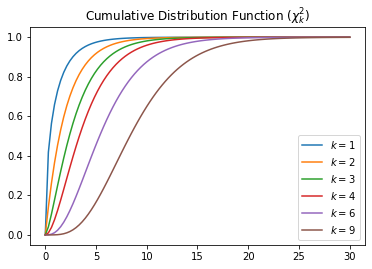

In [19]:
x_vec = np.linspace(0, 30, 100)

for k in [1, 2, 3, 4, 6, 9]:
    chi2_dist = sts.chi2(k)
    cdf_func = chi2_dist.cdf(x_vec)
    plt.plot(x_vec, cdf_func, label='$k=%s$' %k)
    
plt.legend()
plt.title("Cumulative Distribution Function ($\chi^2_k$)");

### График Функции Плотности Распределения Вероятности

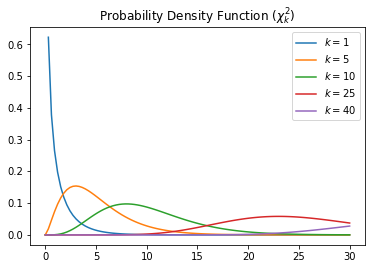

In [20]:
x_vec = np.linspace(0, 30, 100)

for k in [1, 5, 10, 25, 40]:
    chi2_dist = sts.chi2(k)
    pdf_func = chi2_dist.pdf(x_vec)
    plt.plot(x_vec, pdf_func, label='$k=%s$' %k)
    
plt.legend()
plt.title("Probability Density Function ($\chi^2_k$)");

Полный список функций для работы с распределениями в SciPy:
- https://docs.scipy.org/doc/scipy/reference/stats.html
- https://ru.wikipedia.org/wiki/Распределение_вероятностей